In [3]:
import pandas as pd
import numpy as np
import math
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/Shareddrives/Duong-TungPNU/Auto-encoder'
!ls

Mounted at /content/drive
/content/drive/Shareddrives/Duong-TungPNU/Auto-encoder
Autoencoder-CommData.ipynb  data  Multihead-DNN-CommData.ipynb


In [4]:
#@title Read data from .csv

# Path
channel_path = "./data/ChannelAll.csv"
CorAPs_path = "./data/CorAPsAll.csv"
CorIDs_path = "./data/CorIDsAll.csv"
power_path = "./data/Power.csv"
mu_path = "./data/Mu.csv"

# Read csv
channel_array = np.genfromtxt(channel_path, delimiter=',')
CorAPs_array = np.genfromtxt(CorAPs_path, delimiter=',')
CorIDs_array = np.genfromtxt(CorIDs_path, delimiter=',')
power_array = np.genfromtxt(power_path, delimiter=',')
mu_array = np.genfromtxt(mu_path, delimiter=',')

print(np.shape(channel_array))
print(np.shape(CorAPs_array))
print(np.shape(CorIDs_array))
print(np.shape(power_array))
print(np.shape(mu_array))

NoSamples=np.shape(power_array)[1]
NoIDs_max=15 # maximum number of IDs
NoAPs_max=5  # maximum number of APs

print(NoSamples)
print(f"CorAP: {CorAPs_array[:,0:5]}")
print(f"CorID: {CorIDs_array[:,0:5]}")
print(f"MU: {mu_array[:,0]}")

(15, 36480)
(5, 14592)
(15, 14592)
(15, 7296)
(15, 7296)
7296
CorAP: [[518.6   238.49  347.61  250.7   554.56 ]
 [392.47  172.25  338.51  499.71   54.133]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]]
CorID: [[134.57  140.04  557.65  231.31  351.75 ]
 [385.62  279.99  134.63  351.59  213.77 ]
 [ 83.338 299.32  540.63  393.69  217.6  ]
 [540.76  453.15  165.98  294.28  522.73 ]
 [448.59  167.98  189.45  354.42  371.36 ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.   ]]
MU: [2. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Data pre-processing**
- 5000 samples, 
- 1 sample: 
            input size 75x1
            output size 30x1

In [5]:
# inputMode = 1


# inputDim = (NoIDs_max+NoAPs_max)*2 # coordinates 
inputDim = NoIDs_max*NoAPs_max # channel gain 
outputDim = NoIDs_max*2
outputDim1 = NoIDs_max
outputDim2 = NoIDs_max

# Input coordinates
# InputSample=np.zeros((NoSamples,(NoIDs_max+NoAPs_max)*2))
# for i in range(NoSamples):
#   InputSample[i,0:NoAPs_max]=np.transpose(CorAPs_array[:,i*2])
#   InputSample[i,NoAPs_max:NoAPs_max*2]=np.transpose(CorAPs_array[:,i*2+1])
#   InputSample[i,NoAPs_max*2:NoAPs_max*2+NoIDs_max]=np.transpose(CorIDs_array[:,i*2])
#   InputSample[i,NoAPs_max*2+NoIDs_max:NoAPs_max*2+NoIDs_max*2]=np.transpose(CorIDs_array[:,i*2+1])
# print(np.shape(InputSample))
# print(InputSample[0,:])
# Input channel
InputSample=np.zeros((NoSamples,NoIDs_max*NoAPs_max))
for i in range(NoSamples):
  for j in range(NoAPs_max):
    InputSample[i,NoIDs_max*j:NoIDs_max*(j+1)]=np.transpose(channel_array[:,i*NoAPs_max+j])
print(InputSample[0,:])
# print(np.shape(InputSample))

# Output data processing
OutputLabel=np.zeros((NoSamples,NoIDs_max*2))
for i in range(NoSamples): 
  OutputLabel[i,0:NoIDs_max]=np.transpose(power_array[:,i])
  OutputLabel[i,NoIDs_max:NoIDs_max*2]=np.transpose(mu_array[:,i])

print(np.shape(InputSample))
print(np.shape(OutputLabel))
print(OutputLabel[0:3,NoIDs_max:NoIDs_max*2])


[1.9824e-06 4.2046e-05 4.5659e-07 1.3320e-05 1.2620e-04 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 4.3381e-06 4.2897e-05 1.2456e-05
 3.5508e-06 1.1312e-04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]
(7296, 75)
(7296, 30)
[[2. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

**Normalization**

In [6]:
# Normalized Input
InputNormalized=InputSample*0
InputLogNormalized=InputSample*0
for i in range(inputDim):
  term= [j for j in InputSample[:,i] if j > 0] 
  # [j for j in InputSample[i,:] if j > 0]
  if len(term)!=0:
    maxTerm=max(term)
    minTerm=min(term)
    diff=maxTerm-minTerm
    for j in range(NoSamples):
      if InputSample[j,i]>0:
        # InputNormalized[j,i]=(InputSample[j,i]-minTerm)/diff
        InputNormalized[j,i]=np.log(InputSample[j,i])
      # if InputSample[i,j]==minTerm:
      #   InputLogNormalized[i,j]=0
      # else:
      #   InputLogNormalized[i,j]=np.log(InputNormalized[i,j])

print("Input Sample")
print(InputSample[0,:])

print("Input Normalized")
print(InputNormalized[0,:])

# print("Input Log Normalized")
# print(InputLogNormalized[0,:])


Input Sample
[1.9824e-06 4.2046e-05 4.5659e-07 1.3320e-05 1.2620e-04 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 4.3381e-06 4.2897e-05 1.2456e-05
 3.5508e-06 1.1312e-04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]
Input Normalized
[-13.13120233 -10.0767463  -14.59948    -11.22624389  -8.97764261
   0.           0.           0.           0.           0.
   0.  

In [7]:
# Normalized Output
OutputNormalized=OutputLabel*0
OutputLogNormalized=OutputLabel*0

for i in range(NoIDs_max):
  term= [j for j in OutputLabel[:,i] if j > 0] 
  if len(term)!=0:
    maxTerm=max(term)
    minTerm=min(term)
    diff=maxTerm-minTerm
    for j in range(NoSamples):
      OutputNormalized[j,i]=(OutputLabel[j,i]-minTerm)/diff
      # OutputNormalized[j,i]=np.log(OutputLabel[j,i])
    # if OutputLabel[i,j]==minTerm:
    #   OutputLogNormalized[i,j]=0
    # else:
    #   OutputLogNormalized[i,j]=np.log(OutputNormalized[i,j])
print(OutputLabel[0,:])
print(OutputNormalized[0,:])
# print(OutputLogNormalized[0,:])

for i in range(NoIDs_max,NoIDs_max*2):
  term= [j for j in OutputLabel[:,i] if j > 0] 
  if len(term)!=0:
    maxTerm=max(term)
    minTerm=0
    diff=maxTerm-minTerm
    for j in range(NoSamples):
      OutputNormalized[j,i]=(OutputLabel[j,i]-minTerm)/diff
      # OutputNormalized[j,i]=np.log(OutputLabel[j,i])
    # if OutputLabel[i,j]==minTerm:
    #   OutputLogNormalized[i,j]=0
    # else:
    #   OutputLogNormalized[i,j]=np.log(OutputNormalized[i,j])
print(OutputNormalized[0,:])
# print(OutputLogNormalized[0,:])

[1.0805e+01 5.4370e-05 1.8734e+00 4.3076e+01 2.5692e+02 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
[3.60166665e-02 1.80158864e-07 7.28807296e-03 1.43586666e-01
 9.99494262e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[3.60166665e-02 1.80158864e-07 7.28807296e-03 1.43586666e-01
 9.99494262e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0000

## Single-task DNN

In [8]:
#@title DNN model
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader


class neuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(neuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(in_dim, int((in_dim-out_dim)*4/5+out_dim)),
            nn.ReLU(True))
        self.layer2 = nn.Sequential(
            nn.Linear(int((in_dim-out_dim)*4/5+out_dim), int((in_dim-out_dim)*3/5+out_dim)),
            nn.ReLU(True))
        self.layer15 = nn.Sequential(
            nn.Linear(int((in_dim-out_dim)*4/5+out_dim), int((in_dim-out_dim)*4/5+out_dim)),
            nn.ReLU(True))
        self.layer3 = nn.Sequential(
            nn.Linear(int((in_dim-out_dim)*3/5+out_dim), int((in_dim-out_dim)*2/5+out_dim)),
            nn.ReLU(True))
        self.layer4 = nn.Sequential(
            nn.Linear(int((in_dim-out_dim)*2/5+out_dim), int((in_dim-out_dim)*1/5+out_dim)),
            nn.ReLU(True))                    
        self.layer5 = nn.Sequential(
            nn.Linear(int((in_dim-out_dim)*1/5+out_dim), out_dim),
            nn.Sigmoid())

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer15(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

'''Focal Loss'''
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy(inputs.squeeze(),  targets.float())
        loss = self.alpha * (1 - torch.exp(-bce_loss)) ** self.gamma * bce_loss
        return loss

In [9]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32
learning_rate = 1e-5
num_epochs = 100
use_gpu = torch.cuda.is_available()


model = neuralNetwork(inputDim,outputDim)
if use_gpu:
    model = model.cuda()

criterion = FocalLoss()
criterion2 = torch.nn.MSELoss()
# criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
### Input sample here ###
# InputSample
# InputNormalized
# InputLogNormalized
# OutputLabel
# OutputNormalized
# OutputLogNormalized
tensor_x = torch.Tensor(InputNormalized)

tensor_y = torch.Tensor(OutputNormalized)
print(tensor_x)
joint_dataset = TensorDataset(tensor_x,tensor_y)

train_dataset, val_dataset = torch.utils.data.random_split(joint_dataset, [6500, 796])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

tensor([[-13.1312, -10.0767, -14.5995,  ...,   0.0000,   0.0000,   0.0000],
        [-12.1082, -11.5676, -11.1121,  ...,   0.0000,   0.0000,   0.0000],
        [-10.7105, -12.8105, -11.6129,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [-11.3608, -13.3235, -12.7738,  ...,   0.0000,   0.0000,   0.0000],
        [-10.7944, -11.8972, -13.3578,  ...,   0.0000,   0.0000,   0.0000],
        [-12.0620,  -7.6964, -10.3835,  ...,   0.0000,   0.0000,   0.0000]])


In [10]:
LossSave=[]
EvalLossSave=[]
OutSave=[]
for epoch in range(num_epochs): # num_epochs
    print('*' * 10)
    print(f'epoch {epoch+1}')
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):
        img, label = data    
        img = img.view(img.size(0), -1)
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        out = model(img) 

        # estimate out with label
        loss = criterion(out, label)
        running_loss += loss.item()
        # _, pred = torch.max(out, 1)
        # print(pred)
        # print(label)
        # running_acc += (pred == label).float().mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 300 == 0:
            print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}')
    print(f'Finish {epoch+1} epoch, Loss: {running_loss/i:.6f}')
    LossSave.append(running_loss/i)
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    eval_mse = 0.
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        with torch.no_grad():
            out = model(img)

            loss1 = criterion(out, label)
            loss2 = criterion2(out, label)
        eval_loss += loss1.item()
        eval_mse  += loss2.item()
        
        # if OutSave = None: 
        #   OutSave = out
        # else:
        #   OutSave = np.concatenate(OutSave, out, dim = )
        # _, pred = torch.max(out, 1)
        # eval_acc += (pred == label).float().mean()
    # print(f'Test Loss on CE: {eval_loss/len(test_loader):.6f}\n')
    print(f'Test Loss on MSE: {eval_mse/len(test_loader):.6f}\n')
    EvalLossSave.append(eval_loss/len(test_loader))

**********
epoch 1
Finish 1 epoch, Loss: 0.172402
Test Loss on MSE: 0.219164

**********
epoch 2
Finish 2 epoch, Loss: 0.168573
Test Loss on MSE: 0.214958

**********
epoch 3
Finish 3 epoch, Loss: 0.159641
Test Loss on MSE: 0.202531

**********
epoch 4
Finish 4 epoch, Loss: 0.138077
Test Loss on MSE: 0.176206

**********
epoch 5
Finish 5 epoch, Loss: 0.102975
Test Loss on MSE: 0.135969

**********
epoch 6
Finish 6 epoch, Loss: 0.064947
Test Loss on MSE: 0.095893

**********
epoch 7


KeyboardInterrupt: ignored

In [11]:
print(tensor_x[0])
print(np.shape(tensor_x[0]))
print("=======================")
print(f"in Test: {tensor_y[1]}")
outTest=model(tensor_x[1])
print(f"out Test: {outTest}")

tensor([-13.1312, -10.0767, -14.5995, -11.2262,  -8.9776,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000, -12.3481, -10.0567, -11.2933, -12.5483,  -9.0871,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000])
torch.Size([75])
in Test: tensor([1.5217e-04, 2.8979e-05, 4.0821e-05, 3.0912e-05, 1.8476e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,

In [12]:
input = torch.randn(3, 2, requires_grad=True)
print(input)
target = torch.rand(3, 2, requires_grad=False)
print(target)
loss = F.binary_cross_entropy(torch.sigmoid(input), target)
print(loss)

tensor([[-1.6455,  1.0611],
        [ 0.4092,  1.1183],
        [-0.2332, -1.9834]], requires_grad=True)
tensor([[0.5892, 0.2301],
        [0.8523, 0.7714],
        [0.9192, 0.7170]])
tensor(0.9529, grad_fn=<BinaryCrossEntropyBackward0>)


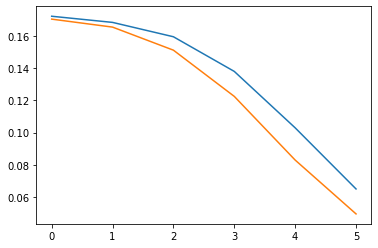

In [13]:
import matplotlib.pyplot as plt
plt.plot(LossSave)
plt.plot(EvalLossSave)

In [ ]:
# InputSample
# InputNormalized
# InputLogNormalized
# OutputLabel
# OutputNormalized
# OutputLogNormalized

tensor_x = torch.Tensor(InputNormalized)

tensor_y = torch.Tensor(OutputNormalized)
 
print(tensor_x)
print(tensor_y)

joint_dataset = TensorDataset(tensor_x,tensor_y)
# train_dataset, val_dataset = torch.utils.data.random_split(joint_dataset, [9000, 737])

train_loader = DataLoader(joint_dataset, batch_size=batch_size, shuffle=False)
# test_loader  = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

for i, data in enumerate(train_loader, 1):
    img, label = data   
    img_view = img.view(img.size(0), -1)
    if use_gpu:
        img = img.cuda()
        label = label.cuda()
    out = model(img)

    if i==1:
        print("TEST")
        print("img")
        print(img_view)
        print(label)
        print(out)
        break


## Multi-task DNN

In [91]:
import torch.nn as nn

#@title DNN model
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader


class neuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim1, out_dim2):
        super(neuralNetwork, self).__init__()
        self.out_dim = out_dim1 + out_dim2
        self.layer1 = nn.Sequential(
            nn.Linear(in_dim, int((in_dim-self.out_dim)*4/5+self.out_dim)),
            nn.ReLU(True))
        self.layer2 = nn.Sequential(
            nn.Linear(int((in_dim-self.out_dim)*4/5+self.out_dim), int((in_dim-self.out_dim)*3/5+self.out_dim)),
            nn.ReLU(True))
        self.layer15 = nn.Sequential(
            nn.Linear(int((in_dim-self.out_dim)*4/5+self.out_dim), int((in_dim-self.out_dim)*4/5+self.out_dim)),
            nn.ReLU(True))
        self.layer3 = nn.Sequential(
            nn.Linear(int((in_dim-self.out_dim)*3/5+self.out_dim), int((in_dim-self.out_dim)*2/5+self.out_dim)),
            nn.ReLU(True))
        self.layer4 = nn.Sequential(
            nn.Linear(int((in_dim-self.out_dim)*2/5+self.out_dim), int((in_dim-self.out_dim)*1/5+self.out_dim)),
            nn.ReLU(True))                    
        self.layer5 = nn.Sequential(
            nn.Linear(int((in_dim-self.out_dim)*1/5+self.out_dim), self.out_dim),
            nn.Sigmoid())

        # Create the two output heads
        self.head1 = nn.Sequential(
            nn.Linear(int(self.out_dim), out_dim1),
            nn.ReLU(True),
            nn.Linear(out_dim1, out_dim1),
            nn.Sigmoid()
        )
        self.head2 = nn.Sequential(
            nn.Linear(int(self.out_dim), out_dim2),
            nn.ReLU(True),
            nn.Linear(out_dim2, out_dim2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer15(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        out1 = self.head1(x)
        out2 = self.head2(x)
        return out1, out2

'''Focal Loss'''
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy(inputs.squeeze(),  targets.float())
        loss = self.alpha * (1 - torch.exp(-bce_loss)) ** self.gamma * bce_loss
        return loss
      

In [104]:
import torch
import torch.nn as nn
import torch.optim as optim

inputDim = NoIDs_max*NoAPs_max # channel gain 
outputDim = NoIDs_max*2
outputDim1 = NoIDs_max
outputDim2 = NoIDs_max

print(f"out1: {outputDim1}, out2: {outputDim2}")

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model, criterion, and optimizer
batch_size = 32
learning_rate = 1e-5
num_epochs = 100
use_gpu = torch.cuda.is_available()


model = neuralNetwork(inputDim,outputDim1, outputDim2)
if use_gpu:
    model = model.cuda()

criterion1 = FocalLoss() 
criterion2 = nn.MSELoss() 
optimizer = optim.Adam(model.parameters())

# Data Pre-processing 
i_data=np.zeros((NoSamples,NoIDs_max*NoAPs_max))
for i in range(NoSamples):
  for j in range(NoAPs_max):
    i_data[i,NoIDs_max*j:NoIDs_max*(j+1)]=np.transpose(channel_array[:,i*NoAPs_max+j])
i_data  = i_data
print(np.shape(i_data))
o_task1 = np.transpose(power_array)
print(np.shape(o_task1))
o_task2 = np.transpose(mu_array)
print(np.shape(o_task2))

# # Define the input data and targets
x  = torch.from_numpy(i_data).to(dtype=torch.float32, device=device)  # input size: (batch_size, 1, sequence_length)
y1 = torch.from_numpy(o_task1).to(dtype=torch.float32, device=device)     # output size: (batch_size, num_filters)
y2 = torch.from_numpy(o_task2).to(dtype=torch.float32, device=device)     # output size: (batch_size, num_filters)

# print(f"x: {x.size()}, y1: {y1.size()}, y2: {y2.size()}")

tensor_x = torch.Tensor(InputNormalized)

tensor_y = torch.Tensor(OutputNormalized)
# print(f"{tensor_x.size()}, {tensor_y.size()}")
joint_dataset = TensorDataset(tensor_x,tensor_y)

train_dataset, val_dataset = torch.utils.data.random_split(joint_dataset, [6500, 796])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

LossSave=[]
EvalLossSave=[]
OutSave=[]
for epoch in range(num_epochs): # num_epochs
    print('*' * 10)
    print(f'epoch {epoch+1}')
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):
        img, label = data    
        # Split the tensor into two tensors
        label_t1, label_t2 = torch.split(label, [15, 15], dim=1)

        img = img.view(img.size(0), -1)
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        out1, out2 = model(img) 
        # estimate out with label
        loss1 = criterion1(out1, label_t1)
        loss2 = criterion1(out2, label_t2)
        loss  = loss1 + loss2
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 300 == 0:
            print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}')
    print(f'Finish {epoch+1} epoch, Loss: {running_loss/i:.6f}')
    LossSave.append(running_loss/i)
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    eval_mse = 0.
    for data in test_loader:
        img, label = data
        label_t1, label_t2 = torch.split(label, [15, 15], dim=1)
        img = img.view(img.size(0), -1)
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        with torch.no_grad():
          out1, out2 = model(img) 
          # estimate out with label
          loss1 = criterion1(out1, label_t1)
          loss2 = criterion1(out2, label_t2)
          focalloss  = loss1 + loss2

          mseloss1 = criterion2(out1, label_t1)
          mseloss2 = criterion2(out2, label_t2)
          mseloss = mseloss1 + mseloss2

        eval_loss += focalloss.item()
        eval_mse  += mseloss.item()
        
        # if OutSave = None: 
        #   OutSave = out
        # else:
        #   OutSave = np.concatenate(OutSave, out, dim = )
        # _, pred = torch.max(out, 1)
        # eval_acc += (pred == label).float().mean()
    print(f'Test Loss on Focal: {eval_loss/len(test_loader):.6f}')
    print(f'Test Loss on MSE: {eval_mse/len(test_loader):.6f}\n')
    EvalLossSave.append(eval_loss/len(test_loader))    

out1: 15, out2: 15
(7296, 75)
(7296, 15)
(7296, 15)
**********
epoch 1
Finish 1 epoch, Loss: 0.083924
Test Loss on Focal: 0.013081
Test Loss on MSE: 0.037413

**********
epoch 2
Finish 2 epoch, Loss: 0.009952
Test Loss on Focal: 0.008113
Test Loss on MSE: 0.030219

**********
epoch 3
Finish 3 epoch, Loss: 0.007616
Test Loss on Focal: 0.007092
Test Loss on MSE: 0.029485

**********
epoch 4
Finish 4 epoch, Loss: 0.006969
Test Loss on Focal: 0.006694
Test Loss on MSE: 0.029293

**********
epoch 5
Finish 5 epoch, Loss: 0.006720
Test Loss on Focal: 0.006525
Test Loss on MSE: 0.029294

**********
epoch 6
Finish 6 epoch, Loss: 0.006567
Test Loss on Focal: 0.006416
Test Loss on MSE: 0.029262

**********
epoch 7
Finish 7 epoch, Loss: 0.006493
Test Loss on Focal: 0.006363
Test Loss on MSE: 0.029252

**********
epoch 8
Finish 8 epoch, Loss: 0.006448
Test Loss on Focal: 0.006312
Test Loss on MSE: 0.029291

**********
epoch 9
Finish 9 epoch, Loss: 0.006390
Test Loss on Focal: 0.006287
Test Loss on 